In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import find_peaks



In [49]:
def add_data(hmap, data, ts):
    if ts not in hmap:
        hmap[ts] = data
    elif data != hmap[ts]:
        print(f"WHY {ts} is already in: {hmap}")

[5.983, 6.048, 6.048, 6.049, 6.05, 5.971, 5.971, 5.892, 5.871, 5.871, 5.816, 5.78, 5.78, 5.702, 5.689, 5.665, 5.726, 5.734, 6.219, 6.213, 6.213, 6.213, 6.083, 6.083, 5.794, 5.794, 5.794, 5.372, 5.372, 5.177, 5.048, 5.048, 4.958, 4.904, 4.904, 5.233, 5.233, 5.34, 5.457, 5.457, 5.471, 5.524, 5.531, 5.531, 5.555, 5.539, 5.539, 5.684, 5.81, 5.81, 6.007, 6.019, 6.005, 6.005, 6.005, 5.878, 5.866, 5.866, 5.789, 5.722, 5.722, 5.661, 5.661, 5.628, 5.689, 5.66, 5.734, 5.734, 5.637, 5.61, 5.61, 5.74, 5.806, 5.806, 5.915, 5.959, 5.959, 5.961, 5.961, 5.961, 5.926, 5.926, 5.926, 6.014, 6.014, 6.014, 6.075, 6.075, 6.051, 6.05, 6.05, 6.032, 6.032, 6.042, 5.953, 5.953, 5.888, 5.752, 5.675, 5.635, 5.614, 5.614, 5.608, 5.685, 5.797, 5.797, 5.797, 5.756, 5.756, 5.756, 5.603, 5.603, 5.603, 5.435, 5.435, 5.407, 5.304, 5.304, 5.307, 5.305, 5.244, 5.259, 5.259, 5.118, 5.099, 5.099, 5.098, 5.04, 5.125, 5.143, 5.171, 5.171, 5.17, 5.141, 5.141, 5.174, 5.209, 5.209, 5.22, 5.22, 5.22, 5.384, 5.771, 5.816, 5.816, 5

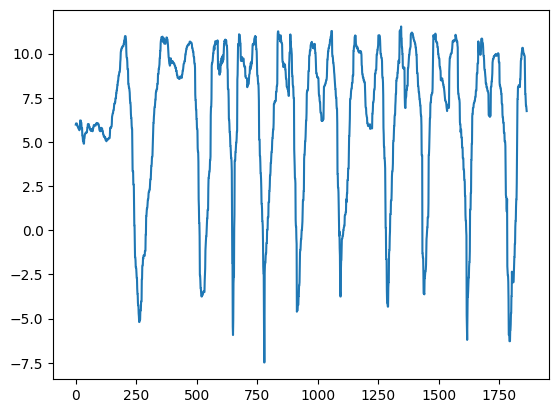

[  18  204  358  675  836 1058 1345 1570 1847]


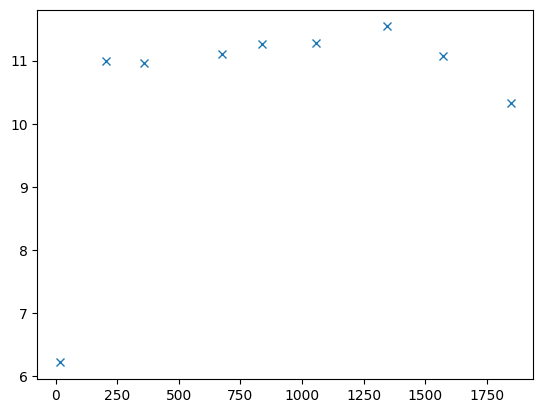

In [50]:
filename = "/Users/j/8803/8803-project/data2/bicep_curl/bicep_jake_set1_reps10_1.csv"

with open(filename, 'r') as file:
    timestamps = []
    accel_x = {}
    accel_y = {}
    accel_z = {}
    gyro_x = {}
    gyro_y = {}
    gyro_z = {}

    for line in file:
        data_line = line.strip()
        if data_line[0].isdigit():
            _, timestamp, accelx, accely, accelz, gyrox,gyroy,gyroz,magx,magy,magz = data_line.split(",")
            timestamp, accelx, accely, accelz, gyrox, gyroy, gyroz = int(timestamp), float(accelx), float(accely), float(accelz), float(gyrox), float(gyroy), float(gyroz)
            idx = None
            if timestamp not in timestamps:
                timestamps.append(timestamp)
                add_data(accel_x, accelx, timestamp)
                add_data(accel_y, accely, timestamp)
                add_data(accel_z, accelz, timestamp)
                add_data(gyro_x, gyrox, timestamp)
                add_data(gyro_y, gyroy, timestamp)
                add_data(gyro_z, gyroz, timestamp)
    
    for ts in timestamps:
        if ts not in accel_x:
            accel_x[ts] = None
        if ts not in accel_y:
            accel_y[ts] = None
        if ts not in accel_z:
            accel_z[ts] = None
        if ts not in gyro_x:
            gyro_x[ts] = None
        if ts not in gyro_y:
            gyro_y[ts] = None
        if ts not in gyro_z:
            gyro_z[ts] = None


    accel_x = dict(sorted(accel_x.items()))
    accel_y = dict(sorted(accel_y.items()))
    accel_z = dict(sorted(accel_z.items()))
    gyro_x = dict(sorted(gyro_x.items()))
    gyro_y = dict(sorted(gyro_y.items()))
    gyro_z = dict(sorted(gyro_z.items()))

    print(list(accel_z.values()))
    peaks, _ = find_peaks(list(accel_z.values()), height=0, distance=150)

    plt.plot(list(accel_z.values()))
    plt.show()

    print(peaks)

    accel_z_array = np.array(list(accel_z.values()))
    plt.plot(peaks, accel_z_array[peaks], "x")
    plt.show()

    #df = pd.DataFrame({'timestamp': timestamps, 'accel_x': accel_x.values(), 'accel_y': accel_y.values(), 'accel_z': accel_z.values(), 'gyro_x': gyro_x.values(), 'gyro_y': gyro_y.values(), 'gyro_z': gyro_z.values()})
    #df.to_csv('raw_df.csv')
    #cleaned_df = df.interpolate(method="linear")
    #cleaned_df.to_csv('cleaned_df.csv')
    #cleaned_df.plot(x="timestamp")
    #plt.title("Bicep Curls")
    #plt.xlabel("Timestamp")
    #plt.ylabel("IMU Data")
    #plt.show()